# Analyzing International football results from 1872 to 2020

### Content
This dataset includes 41,586 results of international football matches starting from the very first official match in 1872 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team. 
csv includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- home_score - full-time home team score including extra time, not including penalty-shootouts
- away_score - full-time away team score including extra time, not including penalty-shootouts
- tournament - the name of the tournament
- city - the name of the city/town/administrative unit where the match was played
- country - the name of the country where the match was played
- neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

Note on team and country names:

For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves - - Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

### Acknowledgements
The data is gathered from several sources including but not limited to Wikipedia, fifa.com, rsssf.com and individual football associations' websites.

### Inspiration
Some directions to take when exploring the data:

- Who is the best team of all time
- Which teams dominated different eras of football
- What trends have there been in international football throughout the ages - home advantage, total goals scored, distribution of teams' strength etc
- Can we say anything about geopolitics from football fixtures - how has the number of countries changed, which teams like to play each other
- Which countries host the most matches where they themselves are not participating in
- How much, if at all, does hosting a major tournament help a country's chances in the tournament
- Which teams are the most active in playing friendlies and friendly tournaments - does it help or hurt them

The world's your oyster, my friend.

The dataset has been taken from https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("International football results from 1872 to 2020.csv")

display(matches.shape)
matches.head(10)

(41586, 9)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [3]:
matches["tournament"].value_counts().head(30)

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
Copa América                              813
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
British Championship                      505
Merdeka Tournament                        503
Gulf Cup                                  380
AFC Asian Cup                             370
Island Games                              350
Gold Cup                                  327
AFF Championship                          293
COSAFA Cup                                292
UEFA Euro                                 286
Nordic Championship                       283
African Nations Championship              264
CFU Caribbean Cup                 

In [4]:
value_distribution_top_20 = matches["tournament"].value_counts().head(20)
df_top = value_distribution_top_20.to_frame()
df_top.reset_index(level=0, inplace=True)
df_top.columns = ['Tournament', 'Count']
df_top.head(35)

,Tournament,Count
0,Friendly,17029
1,FIFA World Cup qualification,7236
2,UEFA Euro qualification,2582
3,African Cup of Nations qualification,1672
4,FIFA World Cup,900
5,Copa América,813
6,AFC Asian Cup qualification,724
7,African Cup of Nations,690
8,CECAFA Cup,620
9,CFU Caribbean Cup qualification,606


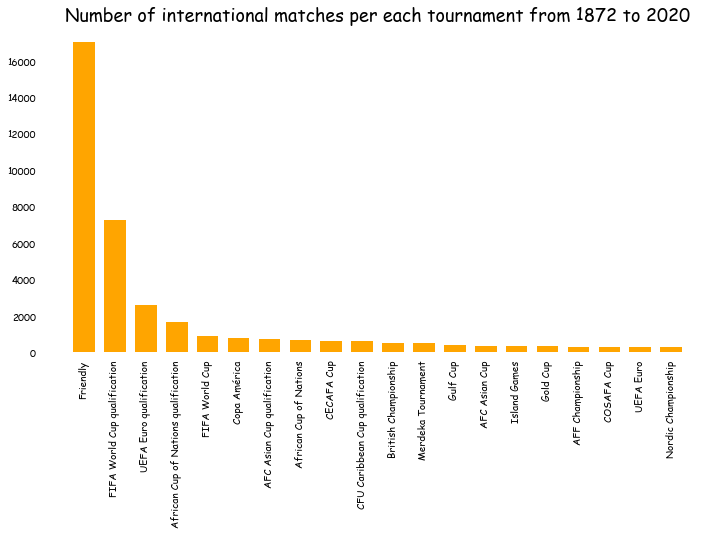

In [5]:
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
#or we could add fontname = 'Comic Sans MS' if we would like to do it separately

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.bar(df_top["Tournament"], df_top["Count"], color='orange', width=0.7)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticklabels(df_top["Tournament"], rotation=90)

ax.set_title("Number of international matches per each tournament from 1872 to 2020", fontsize=18)
ax.tick_params(bottom = False, left = False)

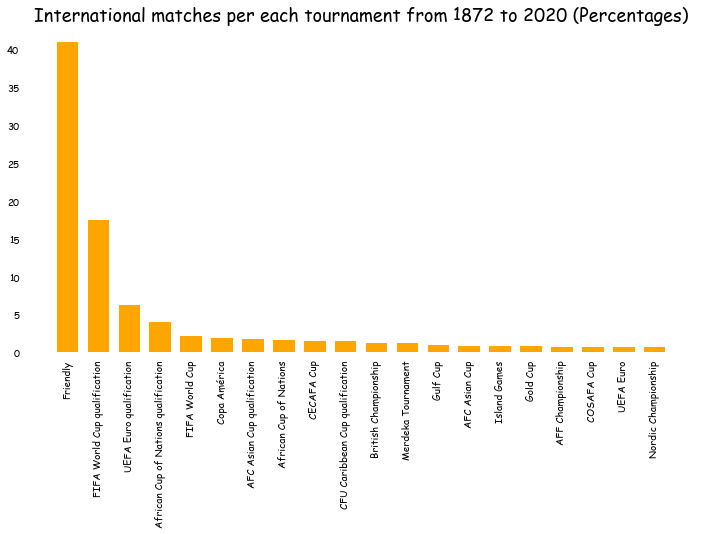

In [6]:
value_distribution_top_20 = matches["tournament"].value_counts(normalize=True).head(20)
df_top_percentages = value_distribution_top_20.to_frame()
df_top_percentages.reset_index(level=0, inplace=True)
df_top_percentages.columns = ['Tournament', 'Percentage']
df_top_percentages.head(35)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.bar(df_top_percentages["Tournament"], df_top_percentages["Percentage"]*100, color='orange', width=0.7)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticklabels(df_top_percentages["Tournament"], rotation=90)

ax.set_title("International matches per each tournament from 1872 to 2020 (Percentages)", fontsize=18)
ax.tick_params(bottom = False, left = False)

As we can out of 41,586 about 17,029 were Friendly matches, which is roughly 40%.

For the sake of fairness we are going to exclude all the friendly matches from the dataset, so our observations would be based on only official matches, since friendly matches are usually not taken seriously in terms of competetivness. 

But we won't completely ignore friendly matches, we'll save it to a different dataset, consisting only of friendly matches. Then do some obeservations and compare them to official matches average statistics and see what's the average goal per match for international friendly matches vs official matches and etc. 

In [7]:
friendly_matches = matches[matches["tournament"] == "Friendly"].copy()
friendly_matches.shape

(17029, 9)

Great, now before moving to main analytics, there is one thing I am curious about. We'll go ahead and check the number of goals per game in international friendlies. 

In [8]:
friendly_matches["total_goals"] = friendly_matches["home_score"] + friendly_matches["away_score"]

goal_per_game_on_average = friendly_matches["total_goals"].sum()/friendly_matches.shape[0]
#or goal_per_game_on_average = friendly_matches["total_goals].mean()

print("Average number of goals in frienldy matches is {}".format(goal_per_game_on_average))

Average number of goals in frienldy matches is 2.898702213870456


In [9]:
#and now let's compare it to the average goals per game in official matches

official_matches = matches[matches["tournament"] != "Friendly"].copy()
display(official_matches.shape)

official_matches["total_goals"] = official_matches["home_score"] + official_matches["away_score"]

print("Average number of goals in official matches is {}".format(official_matches["total_goals"].mean()))

(24557, 9)

Average number of goals in official matches is 2.957364498920878


Surprisingly enough the average number of goals in friendly matches is even a little bit less than in official matches. 

In [10]:
data = ({'Match_types': ['Friendly', 'Official'], 'Average_number_of_goals_per_game': [2.898702213870456, 2.957364498920878]})
df_new = pd.DataFrame(data)
df_new.head()


,Match_types,Average_number_of_goals_per_game
0,Friendly,2.898702
1,Official,2.957364


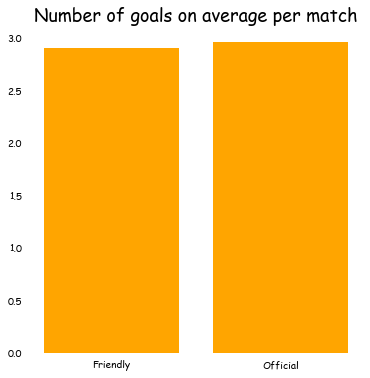

In [11]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.bar(df_new["Match_types"], df_new['Average_number_of_goals_per_game'], color='orange')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Number of goals on average per match", fontsize=18)
ax.tick_params(bottom = False, left = False)

So, surprisingly enough, it turns out that the average number of goals per match is slightly less in Friendly matches compared to Official matches, which is strange at the first glance, assuming that friendly matches imply less competetivness and more entertainment. 

## Main Analytics

Now let's observe each column. 

In [12]:
display(official_matches.shape)
official_matches.reset_index(level=0, inplace=True)
official_matches = official_matches.drop(['index'], axis=1)

display(official_matches.head(10))
official_matches.tail(10)


(24557, 10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,5
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,9
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,4
5,1884-03-29,Scotland,Wales,4,1,British Championship,Glasgow,Scotland,False,5
6,1885-02-28,England,Northern Ireland,4,0,British Championship,Manchester,England,False,4
7,1885-03-14,England,Wales,1,1,British Championship,Blackburn,England,False,2
8,1885-03-14,Scotland,Northern Ireland,8,2,British Championship,Glasgow,Scotland,False,10
9,1885-03-21,England,Scotland,1,1,British Championship,London,England,False,2


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals
24547,2019-12-02,Oman,Saudi Arabia,1,3,Gulf Cup,Doha,Qatar,True,4
24548,2019-12-05,Iraq,Bahrain,2,2,Gulf Cup,Doha,Qatar,True,4
24549,2019-12-05,Qatar,Saudi Arabia,0,1,Gulf Cup,Al Wakrah,Qatar,False,1
24550,2019-12-08,Bahrain,Saudi Arabia,1,0,Gulf Cup,Doha,Qatar,True,1
24551,2019-12-10,China PR,Japan,1,2,EAFF Championship,Busan,South Korea,True,3
24552,2019-12-11,South Korea,Hong Kong,2,0,EAFF Championship,Busan,South Korea,False,2
24553,2019-12-14,Japan,Hong Kong,5,0,EAFF Championship,Busan,South Korea,True,5
24554,2019-12-15,South Korea,China PR,1,0,EAFF Championship,Busan,South Korea,False,1
24555,2019-12-18,Hong Kong,China PR,0,2,EAFF Championship,Busan,South Korea,True,2
24556,2019-12-18,South Korea,Japan,1,0,EAFF Championship,Busan,South Korea,False,1


In [13]:
official_matches.describe(include='all')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals
count,24557,24557,24557,24557.000000,24557.000000,24557,24557,24557,24557,24557.000000
unique,8998,293,291,NaN,NaN,111,1256,242,2,NaN
top,2008-10-11,Argentina,Uruguay,NaN,NaN,FIFA World Cup qualification,Kuala Lumpur,Malaysia,False,NaN
freq,52,382,330,NaN,NaN,7236,529,565,16540,NaN
mean,NaN,NaN,NaN,1.781569,1.175795,NaN,NaN,NaN,NaN,2.957364
std,NaN,NaN,NaN,1.848012,1.461624,NaN,NaN,NaN,NaN,2.136855
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,3.000000
75%,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,4.000000


In [14]:
official_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24557 entries, 0 to 24556
Data columns (total 10 columns):
date           24557 non-null object
home_team      24557 non-null object
away_team      24557 non-null object
home_score     24557 non-null int64
away_score     24557 non-null int64
tournament     24557 non-null object
city           24557 non-null object
country        24557 non-null object
neutral        24557 non-null bool
total_goals    24557 non-null int64
dtypes: bool(1), int64(3), object(6)
memory usage: 1.7+ MB


#### date
This dataset includes all international matches that took place within the last 48 years. One thing we could do with this column is to categorize data based on the date and break it down into 5 periods for example, and compare each decade to one another and see what kind of shift had been taken place in terms of results throughout the time.

#### home_team and away_team
We can try to see which team has most matches and see if there is any correlations with actual success and trophies.

#### home_score and away_score
We can try to see the average, max and min for each.

#### tournament
We already made some observations regarding this column right away and excluded all the frineldy matches (which was about 40%). The remaing official matches have been taken place through 111 different tournaments. FIFA World Cup qualifications being the tournament that provided the biggest number of matches.

#### city and country
We can see which countries hosted the most matches. The top being country being Malaysia and top city being Kuala Lumpur is an already interesting fact, so it's worthy to dive deeper into value distributions of this columnns and try to get some insights.

#### neutral
Again, surprinsgly enough, we have about 8,000 matches that has taken place in a neutral venue. Tournaments like Fifa World Cup, UEFA Euro and Copa America obviously make up some part of this number, but not fully.

## 1. Who is the best team of all time?

This will be our first question, which is a tricky one. 

In [15]:
def detect_winner(home_score, away_score, home_team, away_team):
    if home_score>away_score:
        return home_team
    elif home_score<away_score:
        return away_team
    else: 
        pass
    
official_matches['winner'] = official_matches.apply(
    lambda x: detect_winner(x['home_score'], x['away_score'], x['home_team'], x['away_team']), axis=1)



def detect_loser(home_score, away_score, home_team, away_team):
    if home_score>away_score:
        return away_team
    elif home_score<away_score:
        return home_team
    else: 
        pass
    
official_matches['loser'] = official_matches.apply(
    lambda x: detect_loser(x['home_score'], x['away_score'], x['home_team'], x['away_team']), axis=1)

display(official_matches.shape)
official_matches.head(10)

(24557, 12)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,5,Scotland,Northern Ireland
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6,Wales,Northern Ireland
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,9,England,Northern Ireland
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1,Scotland,England
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,4,England,Wales
5,1884-03-29,Scotland,Wales,4,1,British Championship,Glasgow,Scotland,False,5,Scotland,Wales
6,1885-02-28,England,Northern Ireland,4,0,British Championship,Manchester,England,False,4,England,Northern Ireland
7,1885-03-14,England,Wales,1,1,British Championship,Blackburn,England,False,2,None,None
8,1885-03-14,Scotland,Northern Ireland,8,2,British Championship,Glasgow,Scotland,False,10,Scotland,Northern Ireland
9,1885-03-21,England,Scotland,1,1,British Championship,London,England,False,2,None,None


In [16]:
display(official_matches['winner'].isnull().sum())
official_matches['winner'].value_counts().head(20)

5305

England         347
Argentina       338
Brazil          331
South Korea     321
Scotland        269
Uruguay         260
Sweden          259
Germany         253
Italy           235
Mexico          234
Spain           228
Denmark         210
Netherlands     206
France          203
Russia          201
Japan           199
Zambia          196
Saudi Arabia    192
Thailand        190
Portugal        187
Name: winner, dtype: int64

We can see that there has 5305 draws out of 24557 matches. Also that England has most wins throughout the time, but it would be better to check the number of games played in total to win ratio as well. For that let's create a new dataframe with the following information columns.

- "Team"
- "Games"
- "Wins"
- "Draws"
- "Loses"
- "Games to win ratio"
- "Goals Scored"
- "Goals Conceded"

#### Detecting Total Number of Games Played

In [17]:
df_home_teams = official_matches['home_team'].value_counts().to_frame()
df_home_teams.reset_index(level=0, inplace=True)
df_home_teams.columns = ['team', 'count']
display(df_home_teams.shape)
df_home_teams.head()

(293, 2)

,team,count
0,Argentina,382
1,Brazil,340
2,South Korea,314
3,England,303
4,Scotland,273


In [18]:
df_away_teams = official_matches['away_team'].value_counts().to_frame()
df_away_teams.reset_index(level=0, inplace=True)
df_away_teams.columns = ['team', 'count']
display(df_away_teams.shape)
df_away_teams.head()

(291, 2)

,team,count
0,Uruguay,330
1,England,293
2,Scotland,277
3,Northern Ireland,276
4,Thailand,268


In [19]:
df_all_games = pd.merge(left=df_home_teams, right=df_away_teams, how='outer', on='team')
display(df_all_games.shape)
df_all_games.head()

(296, 3)

,team,count_x,count_y
0,Argentina,382.0,227.0
1,Brazil,340.0,209.0
2,South Korea,314.0,259.0
3,England,303.0,293.0
4,Scotland,273.0,277.0


In [20]:
df_all_games = df_all_games.fillna(0)
df_all_games['games'] = df_all_games['count_x'] + df_all_games['count_y']
display(df_all_games.head(10))
display(df_all_games.tail(10))

#while doing an outer join as a result we had some NaNs in the dataset. (Example Monaco had only 3 away games, but 0 home games),
#so we replaced NaN-s with zeros instead.

,team,count_x,count_y,games
0,Argentina,382.0,227.0,609.0
1,Brazil,340.0,209.0,549.0
2,South Korea,314.0,259.0,573.0
3,England,303.0,293.0,596.0
4,Scotland,273.0,277.0,550.0
5,Thailand,256.0,268.0,524.0
6,Northern Ireland,251.0,276.0,527.0
7,Wales,250.0,253.0,503.0
8,Chile,245.0,203.0,448.0
9,Malaysia,241.0,202.0,443.0


,team,count_x,count_y,games
286,Crimea,1.0,4.0,5.0
287,Yemen DPR,1.0,6.0,7.0
288,Cascadia,1.0,5.0,6.0
289,Saint Pierre and Miquelon,1.0,6.0,7.0
290,Parishes of Jersey,1.0,1.0,2.0
291,Yorkshire,1.0,0.0,1.0
292,Sark,1.0,3.0,4.0
293,Western Australia,0.0,29.0,29.0
294,Two Sicilies,0.0,4.0,4.0
295,Monaco,0.0,3.0,3.0


In [21]:
df_all_games = df_all_games.drop(["count_x", "count_y"], axis=1)

display(df_all_games.shape)
df_all_games.head(10)

(296, 2)

,team,games
0,Argentina,609.0
1,Brazil,549.0
2,South Korea,573.0
3,England,596.0
4,Scotland,550.0
5,Thailand,524.0
6,Northern Ireland,527.0
7,Wales,503.0
8,Chile,448.0
9,Malaysia,443.0


#### Detecting Wins and Loses

In [22]:
df_winners = official_matches['winner'].value_counts().to_frame()
df_winners.reset_index(level=0, inplace=True)
df_winners.columns = ['team', 'wins']
display(df_winners.shape)
df_winners.head()

(285, 2)

,team,wins
0,England,347
1,Argentina,338
2,Brazil,331
3,South Korea,321
4,Scotland,269


In [23]:
df_losers = official_matches['loser'].value_counts().to_frame()
df_losers.reset_index(level=0, inplace=True)
df_losers.columns = ['team', 'loses']
display(df_losers.shape)
df_losers.head()

(294, 2)

,team,loses
0,Northern Ireland,278
1,Finland,237
2,Wales,235
3,Luxembourg,219
4,Thailand,211


In [24]:
df_winners_and_losers = pd.merge(left=df_winners, right=df_losers, how='outer', on='team')
df_winners_and_losers = df_winners_and_losers.fillna(0)

df_winners_and_losers.head()

,team,wins,loses
0,England,347.0,105.0
1,Argentina,338.0,132.0
2,Brazil,331.0,102.0
3,South Korea,321.0,103.0
4,Scotland,269.0,160.0


In [25]:
df_five = pd.merge(left=df_all_games, right=df_winners_and_losers, how='outer', on='team')
df_five['ratio'] = (df_five['wins']/df_five['games'])

display(df_five.shape)
df_five.head()

(296, 5)

,team,games,wins,loses,ratio
0,Argentina,609.0,338.0,132.0,0.555008
1,Brazil,549.0,331.0,102.0,0.602914
2,South Korea,573.0,321.0,103.0,0.560209
3,England,596.0,347.0,105.0,0.582215
4,Scotland,550.0,269.0,160.0,0.489091


In [26]:
#detecting draws based on the date we already have in the df above/adding draw column
df_five['draws'] = df_five['games'] - df_five['wins'] - df_five['loses']

But the thing is that there are several countries that are not recognized as such usually and had let's say only 2 registered official matches and both of them resulted a win, which will obviously distort the games to win ratio. So we can go ahead and filter the dataframe from those matches and leave only countries that had at least 100 official matches. And then finally sort the dataframe based on ratio column.

In [27]:
df_five = df_five[df_five['games'] > 150]

df_five.shape

(132, 6)

In [28]:
df_five = df_five.sort_values('ratio', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and delete the new added 'index' column.
df_five.reset_index(level=0, inplace=True)
df_five = df_five.drop(['index'], axis=1)

df_five.head(10)

,team,games,wins,loses,ratio,draws
0,Germany,380.0,253.0,52.0,0.665789,75.0
1,Spain,359.0,228.0,61.0,0.635097,70.0
2,Netherlands,335.0,206.0,67.0,0.614925,62.0
3,Brazil,549.0,331.0,102.0,0.602914,116.0
4,Iran,296.0,175.0,46.0,0.591216,75.0
5,England,596.0,347.0,105.0,0.582215,144.0
6,Russia,348.0,201.0,75.0,0.577586,72.0
7,Czech Republic,188.0,108.0,47.0,0.574468,33.0
8,France,354.0,203.0,73.0,0.573446,78.0
9,Italy,415.0,235.0,67.0,0.566265,113.0


In [29]:
#rearranging the order of columns

df_five = df_five[['team', 'games', 'wins', 'draws', 'loses', 'ratio']].copy()
df_five.rename({"ratio": "games to win ratio"}, axis=1, inplace=True)
df_five.head(10)

,team,games,wins,draws,loses,games to win ratio
0,Germany,380.0,253.0,75.0,52.0,0.665789
1,Spain,359.0,228.0,70.0,61.0,0.635097
2,Netherlands,335.0,206.0,62.0,67.0,0.614925
3,Brazil,549.0,331.0,116.0,102.0,0.602914
4,Iran,296.0,175.0,75.0,46.0,0.591216
5,England,596.0,347.0,144.0,105.0,0.582215
6,Russia,348.0,201.0,72.0,75.0,0.577586
7,Czech Republic,188.0,108.0,33.0,47.0,0.574468
8,France,354.0,203.0,78.0,73.0,0.573446
9,Italy,415.0,235.0,113.0,67.0,0.566265


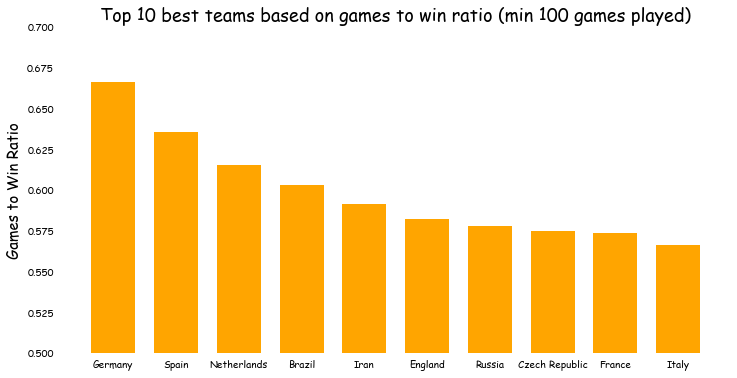

In [30]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.bar(df_five["team"][:10], df_five["games to win ratio"][:10], color='orange', width=0.7)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylim(0.5, 0.7)

ax.set_title("Top 10 best teams based on games to win ratio (min 100 games played)", fontsize=18)

ax.set_ylabel("Games to Win Ratio",fontsize=15)
ax.tick_params(bottom = False, left = False)

Looking on the bar plot and the table above we can conclude couple of things.

Firstly, in football, the best teams are considered to be not only those who have been consistent over the years in terms of average ratios and results but also those who win major trophies regardless of the other statistics. Trophy is a trophy. 

Now let's analyze the major trophies winners list so far and decide based on these 2 factors. 

#### EURO
- Germany, Spain - 3
- France - 2
- Russia, Italy, Czech, Portugal, Netherlands, Denmark, Greece - 1


#### WORLD CUP
- Brazil - 5
- Germany, Italy - 4
- Argentina, France, Uruguay - 2
- England, Spain - 1

#### COPA AMERICA
- Uruguay - 15 
- Argentina - 14
- Brazil - 9

So taking into account trophies we'll have the following picture.

- Germany = 4 World Cups + 3 Euros
- Spain = 1 World Cups + 3 Euros
- Netherlands = 1 Euros
- Brazil = 5 World Cups + 9 Copa Americas
- England = 1 World Cup
- Russia = 1 Euros
- Czech = 1 Euros
- France = 2 World Cups + 2 Euros
- Italy = 4 World Cups + 1 Euros

Looking on the list above it's obvious that we would need to drop Netherlands, Russia, England and Czech simply because solely 1 major trophy is definitely not enough to be considered the best, despite any kind of consistency and games to win ratio. So we'll have to pick between the remaining 5.

- Germany = 4 World Cups + 3 Euros
- Spain = 1 World Cups + 3 Euros
- Brazil = 5 World Cups + 9 Copa Americas
- France = 2 World Cups + 2 Euros
- Italy = 4 World Cups + 1 Euros

It would be safe to say that considering the 'Games to win ratio' and the 'Number of major trophies won' the best and most conistent international team should be considered either Germany or Brazil. 

It's really tough to determine, because of several reasons, but mainly because Brazil has never participated in the same ground as Germany did, for obvious geographical reasons, so it's harder to consider Copa America as equivalent or as major as Euro, with all the respect to it.

When it comes to comparing the other things that are comparable which is

- World Cups won: __Brazil 5__ - Germany 4
- Games to win ratio: Brazil 0.61 - __0.66 Germany__

We can consider it as a tie. 

Interesting fact. The team that has the most wins in absolute numbers (430 wins) is ... __ENGLAND__! 

Now let's move forward and also add the columns for points, which won't drastically change the whole picture (since it's indiciating also something similar to games to ratio number, since it also msotly depends on the number of wins), but will be definitely interesting to determine. 

## Finalizing the table with Goals and Points

In [31]:
official_matches.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,5,Scotland,Northern Ireland
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6,Wales,Northern Ireland
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,9,England,Northern Ireland
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1,Scotland,England
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,4,England,Wales
5,1884-03-29,Scotland,Wales,4,1,British Championship,Glasgow,Scotland,False,5,Scotland,Wales
6,1885-02-28,England,Northern Ireland,4,0,British Championship,Manchester,England,False,4,England,Northern Ireland
7,1885-03-14,England,Wales,1,1,British Championship,Blackburn,England,False,2,None,None
8,1885-03-14,Scotland,Northern Ireland,8,2,British Championship,Glasgow,Scotland,False,10,Scotland,Northern Ireland
9,1885-03-21,England,Scotland,1,1,British Championship,London,England,False,2,None,None


In [32]:
df_five.head()

,team,games,wins,draws,loses,games to win ratio
0,Germany,380.0,253.0,75.0,52.0,0.665789
1,Spain,359.0,228.0,70.0,61.0,0.635097
2,Netherlands,335.0,206.0,62.0,67.0,0.614925
3,Brazil,549.0,331.0,116.0,102.0,0.602914
4,Iran,296.0,175.0,75.0,46.0,0.591216


We'll need to generate 4 following new dataframes with groupby method.

- GOALS SCORED AT HOME
- GOALS SCORED AWAY
- GOALS CONCEDED AT HOME
- GOALS CONCEDED AWAY

Then we'll merge this all 4 together on 'team' column with an outer join. And then just simply add and substract the 4 columns describing goals to get the total goals scored and conceded, and then the difference. 

In [33]:
#GOALS SCORED AT HOME

goals_scored_at_home = official_matches.groupby("home_team").agg({'home_score':'sum'})
goals_scored_at_home.reset_index(level=0, inplace=True)
goals_scored_at_home.columns = ['team', 'scored']

display(goals_scored_at_home.shape)
goals_scored_at_home.sort_values('scored', ascending=False).head()

(293, 2)

,team,scored
11,Argentina,879
33,Brazil,851
77,England,729
239,South Korea,702
225,Scotland,545


In [34]:
#GOAL SCORED AWAY

goals_scored_away = official_matches.groupby("away_team").agg({'away_score':'sum'})
goals_scored_away.reset_index(level=0, inplace=True)
goals_scored_away.columns = ['team', 'scored']

display(goals_scored_away.shape)
goals_scored_away.sort_values('scored', ascending=False).head()

(291, 2)

,team,scored
76,England,576
271,Uruguay,499
243,Sweden,443
222,Scotland,432
236,South Korea,405


In [35]:
#GOALS CONCEDED AT HOME

goals_conceded_at_home = official_matches.groupby("home_team").agg({'away_score':'sum'})
goals_conceded_at_home.reset_index(level=0, inplace=True)
goals_conceded_at_home.columns = ['team', 'conceded']

display(goals_conceded_at_home.shape)
goals_conceded_at_home.sort_values('conceded', ascending=False).head()

(293, 2)

,team,conceded
183,Northern Ireland,439
87,Finland,365
279,Wales,359
11,Argentina,347
147,Luxembourg,336


In [36]:
#GOALS CONCEDED AWAY

goals_conceded_away = official_matches.groupby("away_team").agg({'home_score':'sum'})
goals_conceded_away.reset_index(level=0, inplace=True)
goals_conceded_away.columns = ['team', 'conceded']

display(goals_conceded_away.shape)
goals_conceded_away.sort_values('conceded', ascending=False).head()

(291, 2)

,team,conceded
181,Northern Ireland,590
86,Finland,535
253,Thailand,524
193,Paraguay,497
277,Wales,484


In [37]:
#Now we'll add this 4 tables together.

total_goals_scored = pd.merge(left=goals_scored_at_home, right=goals_scored_away, how='outer', on='team')
total_goals_scored = total_goals_scored.fillna(0)

total_goals_conceded = pd.merge(left=goals_conceded_at_home, right=goals_conceded_away, how='outer', on='team')
total_goals_conceded = total_goals_conceded.fillna(0)

all_goals = pd.merge(left=total_goals_scored, right=total_goals_conceded, how='outer', on='team')
all_goals = all_goals.fillna(0)

all_goals['total scored'] = all_goals['scored_x'] + all_goals['scored_y']
all_goals['total conceded'] = all_goals['conceded_y'] + all_goals['conceded_y']
all_goals['goal difference'] = all_goals['total scored'] - all_goals['total conceded']

all_goals = all_goals.sort_values('goal difference', ascending=False)
all_goals.reset_index(level=0, inplace=True)
all_goals = all_goals.drop(['index'], axis=1)

all_goals_updated = all_goals[['team','total scored','total conceded','goal difference']].copy()

display(all_goals_updated.shape)
all_goals_updated.head(15)

(296, 4)

,team,total scored,total conceded,goal difference
0,England,1305.0,540.0,765.0
1,Brazil,1207.0,462.0,745.0
2,South Korea,1107.0,496.0,611.0
3,Argentina,1199.0,610.0,589.0
4,Germany,900.0,346.0,554.0
5,Spain,782.0,370.0,412.0
6,Netherlands,731.0,338.0,393.0
7,Iran,614.0,224.0,390.0
8,Japan,711.0,322.0,389.0
9,Australia,632.0,246.0,386.0


In [38]:
#Now let's merge this with the rest

df_final = pd.merge(left=df_five, right=all_goals_updated, how='outer', on='team')
df_final = df_final.fillna(0)

display(df_final.shape)
df_final.head(10)

(296, 9)

,team,games,wins,draws,loses,games to win ratio,total scored,total conceded,goal difference
0,Germany,380.0,253.0,75.0,52.0,0.665789,900.0,346.0,554.0
1,Spain,359.0,228.0,70.0,61.0,0.635097,782.0,370.0,412.0
2,Netherlands,335.0,206.0,62.0,67.0,0.614925,731.0,338.0,393.0
3,Brazil,549.0,331.0,116.0,102.0,0.602914,1207.0,462.0,745.0
4,Iran,296.0,175.0,75.0,46.0,0.591216,614.0,224.0,390.0
5,England,596.0,347.0,144.0,105.0,0.582215,1305.0,540.0,765.0
6,Russia,348.0,201.0,72.0,75.0,0.577586,649.0,360.0,289.0
7,Czech Republic,188.0,108.0,33.0,47.0,0.574468,340.0,188.0,152.0
8,France,354.0,203.0,78.0,73.0,0.573446,680.0,328.0,352.0
9,Italy,415.0,235.0,113.0,67.0,0.566265,720.0,406.0,314.0


Sooo, England is not only the team with the most wins, England is the team who scored the most and has the best goal difference so far. 

Which is quite interesting, but mainly a result of being the 'oldest', with almost 600 matches already played, in this list above we can see that only Brazil has played that many matches which resulted having similar numbers in terms of wins and goals. 

#### Now let's define a formula that will calculate the points for each team and then add 'points' and 'points per game 'columns. Then sort the table by 'points per game' column. 

In [39]:
df_final['points'] = df_final['wins']*3 + df_final['draws']*1
df_final['points per game'] = df_final['points']/df_final['games']
df_final = df_final.sort_values('points per game', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and then dropping the old one that was converted to a regular column with a name index.
df_final.reset_index(level=0, inplace=True)
df_final = df_final.drop(['index'], axis=1)

display(df_final.shape)
df_final.head(10)

(296, 11)

,team,games,wins,draws,loses,games to win ratio,total scored,total conceded,goal difference,points,points per game
0,Germany,380.0,253.0,75.0,52.0,0.665789,900.0,346.0,554.0,834.0,2.194737
1,Spain,359.0,228.0,70.0,61.0,0.635097,782.0,370.0,412.0,754.0,2.100279
2,Netherlands,335.0,206.0,62.0,67.0,0.614925,731.0,338.0,393.0,680.0,2.029851
3,Iran,296.0,175.0,75.0,46.0,0.591216,614.0,224.0,390.0,600.0,2.027027
4,Brazil,549.0,331.0,116.0,102.0,0.602914,1207.0,462.0,745.0,1109.0,2.020036
5,England,596.0,347.0,144.0,105.0,0.582215,1305.0,540.0,765.0,1185.0,1.988255
6,Italy,415.0,235.0,113.0,67.0,0.566265,720.0,406.0,314.0,818.0,1.971084
7,France,354.0,203.0,78.0,73.0,0.573446,680.0,328.0,352.0,687.0,1.940678
8,South Korea,573.0,321.0,149.0,103.0,0.560209,1107.0,496.0,611.0,1112.0,1.940663
9,Russia,348.0,201.0,72.0,75.0,0.577586,649.0,360.0,289.0,675.0,1.939655


#### SOOO, ONCE AGAIN, THE BEST TEAMS IN THE WORLD ARE....

Looking at this new table sorted by points per game and also considering major trophies, once again we can clearly distinguish 3 following spots.

1. Germany, Brazil
2. Spain, Italy, France 
3. Netherlands, England

Yes, all the 3 spots are shared, because it's really arbitrary to pick between them, but the difference between each group is distinct enough to put them in small groups/categories.

## 2. Which teams dominated different eras of football?

https://www.bigsoccer.com/threads/looking-at-soccer-history-in-eras.2035606/

Football is divivded into 13 different eras.

- 1872-1916, The Golden Age of British Football (44)
- 1916-1930, Emergence of Continental and American Football Post WWI (14)
- 1930-1938, Golden Age of Inter-war Football in Europe (8)
- 1938-1948, WWII and Golden Age in South America (10)
- 1948-1957, Hungary and El Dorado (9)
- 1957-1963, Brazil and the Advent of Major International Club Competitions (6)
- 1963-1970, Brazil Reloads, Italy and Britain Rise in Europe (6)
- 1970-1978, Dutch and German Domination (8)
- 1978-1986, Maradona, Zico, Platinni (8)
- 1986-1996, Italy, Spain, France Spending Spree, Football Fully Modernized (10)
- 1996-2006, Zidane's France and Ronaldo's Brazil (10)
- 2007-2016, Messi and Ronaldo Club Domination, Spain and Germany International Domination (9)
- 2016-2020, Portugal 2016 Euros, France 2018 World Cup (4)

13 bins would too much to consider each one separately and for categorization, so based on this detailed distingushment we'll do a broader one with 4 bins.

- 1872-1930 | 'Golden age of British football and Emergence of continental footbal post WW1' (58)
- 1930-1957 | 'Inter-war football in Europe and Golden age in South America' (27)
- 1957-1986 | 'Advent of Major International Club Competitions' (29)
- 1986-2020 | 'Football fully modernized' (34)


In [40]:
display(official_matches.shape)
official_matches.head()

(24557, 12)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,5,Scotland,Northern Ireland
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6,Wales,Northern Ireland
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,9,England,Northern Ireland
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1,Scotland,England
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,4,England,Wales


We'll need to play with 'date' column. Since while dividing football into eras we took into account only years, so firstly we'll extract a new date column including only the year to simplify everything. 

Then we'll go ahead and create a new column 'era' which will put the name of the era based on the year. 

Then we'll just do a groupby by 'era' column or just create a new dataframe for each era.

It's good because once the same dataframe filtered for each era is created, all we need to do is just the same thing above but in a shortened version and preferably in 1 or 2 cells, so it'll be revision and also good experience with writing the same thing in more consize and less cells consuming way. 

Also consider dividing football into more broad 5 eras let's say, instead of 13. 

In [41]:
official_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24557 entries, 0 to 24556
Data columns (total 12 columns):
date           24557 non-null object
home_team      24557 non-null object
away_team      24557 non-null object
home_score     24557 non-null int64
away_score     24557 non-null int64
tournament     24557 non-null object
city           24557 non-null object
country        24557 non-null object
neutral        24557 non-null bool
total_goals    24557 non-null int64
winner         19252 non-null object
loser          19252 non-null object
dtypes: bool(1), int64(3), object(8)
memory usage: 2.1+ MB


In [42]:
# we see that our 'date' column is not a datetime object yet, so firstly we'll convert it to a datetime object, then extract only the year out of it and then create a new column named 'year'

official_matches['date'] = official_matches['date'].astype('datetime64[ns]') 
official_matches['year'] = official_matches['date'].dt.year
display(official_matches.info()) #making sure that it got changed to datetime
official_matches.head() #checking the new 'year' column

# this below is another more sophisticated way of doing the same thing using lambda and apply
# official_matches['date'] = pd.to_datetime(official_matches['date'])
# official_matches['year'] = official_matches['date'].apply(lambda x: x.year)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24557 entries, 0 to 24556
Data columns (total 13 columns):
date           24557 non-null datetime64[ns]
home_team      24557 non-null object
away_team      24557 non-null object
home_score     24557 non-null int64
away_score     24557 non-null int64
tournament     24557 non-null object
city           24557 non-null object
country        24557 non-null object
neutral        24557 non-null bool
total_goals    24557 non-null int64
winner         19252 non-null object
loser          19252 non-null object
year           24557 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(7)
memory usage: 2.3+ MB


None

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser,year
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,5,Scotland,Northern Ireland,1884
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6,Wales,Northern Ireland,1884
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,9,England,Northern Ireland,1884
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1,Scotland,England,1884
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,4,England,Wales,1884


In [43]:
official_matches['year'].value_counts(bins=13)

(2008.615, 2019.0]      6842
(1998.231, 2008.615]    5879
(1987.846, 1998.231]    4354
(1977.462, 1987.846]    2529
(1967.077, 1977.462]    2102
(1956.692, 1967.077]    1333
(1946.308, 1956.692]     549
(1925.538, 1935.923]     332
(1935.923, 1946.308]     283
(1915.154, 1925.538]     138
(1904.769, 1915.154]      91
(1883.864, 1894.385]      65
(1894.385, 1904.769]      60
Name: year, dtype: int64

In [44]:
def detect_era(year):
    if 1872 <= year < 1930:
        return 'Golden age of British football and Emergence of continental footbal post WW1'
    elif 1930 <= year < 1957:
        return 'Inter-war football in Europe and Golden age in South America'
    elif 1957 <= year < 1986:
        return 'Advent of Major International Club Competitions'
    elif 1986 <= year < 2020:
        return 'Football fully modernized'
    else:
        pass
    
official_matches['era'] = official_matches.apply(lambda x: detect_era(x['year']), axis=1)

display(official_matches.head())
official_matches['era'].value_counts()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser,year,era
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,5,Scotland,Northern Ireland,1884,Golden age of British football and Emergence o...
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6,Wales,Northern Ireland,1884,Golden age of British football and Emergence o...
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,9,England,Northern Ireland,1884,Golden age of British football and Emergence o...
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1,Scotland,England,1884,Golden age of British football and Emergence o...
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,4,England,Wales,1884,Golden age of British football and Emergence o...


Football fully modernized                                                       17481
Advent of Major International Club Competitions                                  5558
Inter-war football in Europe and Golden age in South America                     1068
Golden age of British football and Emergence of continental footbal post WW1      450
Name: era, dtype: int64

So we have the following picture.

- 1872-1930 | 'Golden age of British football and Emergence of continental footbal post WW1' (58 years) (450 matches)
- 1930-1957 | 'Inter-war football in Europe and Golden age in South America' (27 years) (1068 matches)
- 1957-1986 | 'Advent of Major International Club Competitions' (29 years) (5558 matches)
- 1986-2020 | 'Football fully modernized' (34 years) (17481 matches)

So basically

- Within the the first 85 years we had only about 1518 matches.
- Then within the next 29 years we had 5558 matches.
- And then finally within the next modern 34 years we had 17481 matches.

So it's not crystal clear what is the right thing to do in terms of era divisions. Is it better to stick to the historical meaning behind each era? Or it might be better to divide into 4 bins with relatively equal number of games. But in this case the comparison would not be that fair because we might end up comparing results that have been taken 100 years far from each other. 

So we'll just stick to this rough division solely based on history and more or leas similar year frames, neglecting the fact that the number of games were drasticly different, and will focus only on relative comparisons.

And then later on, if needed, we'll just create a new dataframe of "Modern Fooball" including only matches of this recent past 34 years (which is actually 71% of our dataframe and so I would assume that it won't differ drasticly from the whole picture), and then divide this new dataframe into another 4 suberas just based on decades (almost decades, 34 years divided into 4 will give us 8,5 year time frame for each bin which is ok). 

But for now let's move to analyzing this 4 main eras. 

## 2.1 Golden age of British football and rise of continental footbal post WW1 (1872-1930 )

In [45]:
first_era_df = official_matches[official_matches['era'] == 'Golden age of British football and Emergence of continental footbal post WW1'].copy() 

display(first_era_df.shape)
first_era_df.head(3)

(450, 14)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser,year,era
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,5,Scotland,Northern Ireland,1884,Golden age of British football and Emergence o...
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6,Wales,Northern Ireland,1884,Golden age of British football and Emergence o...
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,9,England,Northern Ireland,1884,Golden age of British football and Emergence o...


#### CREATING A NEW DATAFRAME (REGULAR TABLE LIKE WITH EACH ROW REPRESENTING  TEAM): DETECTING GAMES PLAYED

In [46]:
#creating a dataframe that shows how many home games each team had
first_df_home_teams = first_era_df['home_team'].value_counts().to_frame()
first_df_home_teams.reset_index(level=0, inplace=True)
first_df_home_teams.columns = ['team', 'count']

#creating a dataframe that shows how many away games each team had
first_df_away_teams = first_era_df['away_team'].value_counts().to_frame()
first_df_away_teams.reset_index(level=0, inplace=True)
first_df_away_teams.columns = ['team', 'count']

#merging the 2 dataframes generated above together with an outer join
first_df_all_games = pd.merge(left=first_df_home_teams, right=first_df_away_teams, how='outer', on='team')
first_df_all_games = first_df_all_games.fillna(0) #while doing an outer join as a result we had some NaNs in the dataset. (Example Monaco had only 3 away games, but 0 home games),so we replaced NaN-s with zeros instead.

#summing the home and away games counts to get the total games played and then dropping unnecessary columns
first_df_all_games['games'] = first_df_all_games['count_x'] + first_df_all_games['count_y']
first_df_all_games = first_df_all_games.drop(["count_x", "count_y"], axis=1)

display(first_df_all_games.shape)
first_df_all_games.head(30)

(25, 2)

,team,games
0,Argentina,113.0
1,England,125.0
2,Northern Ireland,122.0
3,Wales,123.0
4,Scotland,124.0
5,Uruguay,99.0
6,Brazil,31.0
7,Chile,23.0
8,Norway,13.0
9,Sweden,13.0


#### DETECTING WINS AND LOSES

In [47]:
#creating a dataframe that shows how many home wins each team had
first_df_winners = first_era_df['winner'].value_counts().to_frame()
first_df_winners.reset_index(level=0, inplace=True)
first_df_winners.columns = ['team', 'wins']

#creating a dataframe that shows how many home loses each team had
first_df_losers = first_era_df['loser'].value_counts().to_frame()
first_df_losers.reset_index(level=0, inplace=True)
first_df_losers.columns = ['team', 'loses']

#merging the 2 dataframes generated above together with an outer join STEX
first_df_winners_and_losers = pd.merge(left=first_df_winners, right=first_df_losers, how='outer', on='team')
first_df_winners_and_losers = first_df_winners_and_losers.fillna(0)

display(first_df_winners_and_losers.shape)
first_df_winners_and_losers.head(30)

(25, 3)

,team,wins,loses
0,Scotland,77.0,22.0
1,England,73.0,24.0
2,Argentina,54.0,35.0
3,Uruguay,48.0,32.0
4,Wales,28.0,68.0
5,Northern Ireland,20.0,84.0
6,Brazil,12.0,12.0
7,Paraguay,10.0,19.0
8,Sweden,8.0,4.0
9,Denmark,8.0,3.0


#### DETECTING DRAWS AND GAMES TO WIN RATIO BY JOINING THE 2 DATAFRAMES ABOVE 

In [48]:
#joining the first dataframe cointaing 'team' and 'games' with the dataframe that contains 'team', 'wins', 'loses'.
first_df_join = pd.merge(left=first_df_all_games, right=first_df_winners_and_losers, how='outer', on='team')

#detecting games to win ratio
first_df_join['ratio'] = (first_df_join['wins']/first_df_join['games'])

#detecting draws based on the data we already have in the df above/adding draw column
first_df_join['draws'] = first_df_join['games'] - first_df_join['wins'] - first_df_join['loses']

#sorting it based on the games to win ratio
first_df_join = first_df_join.sort_values('ratio', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and delete the new added 'index' column.
first_df_join.reset_index(level=0, inplace=True)
first_df_join = first_df_join.drop(['index'], axis=1)

#rearranging the order of columns
first_df_join = first_df_join[['team', 'games', 'wins', 'draws', 'loses', 'ratio']].copy()
first_df_join.rename({"ratio": "games to win ratio"}, axis=1, inplace=True)

first_df_join.head(32)

,team,games,wins,draws,loses,games to win ratio
0,Romania,1.0,1.0,0.0,0.0,1.000000
1,Latvia,4.0,3.0,1.0,0.0,0.750000
2,Austria,8.0,5.0,0.0,3.0,0.625000
3,Scotland,124.0,77.0,25.0,22.0,0.620968
4,Sweden,13.0,8.0,1.0,4.0,0.615385
5,Denmark,13.0,8.0,2.0,3.0,0.615385
6,England,125.0,73.0,28.0,24.0,0.584000
7,Hungary,7.0,4.0,1.0,2.0,0.571429
8,Italy,7.0,4.0,1.0,2.0,0.571429
9,Estonia,4.0,2.0,1.0,1.0,0.500000


#### DETECTING GOALS

We'll need to generate 4 following new dataframes with groupby method.

- GOALS SCORED AT HOME
- GOALS SCORED AWAY
- GOALS CONCEDED AT HOME
- GOALS CONCEDED AWAY

Then we'll merge this all 4 together on 'team' column with an outer join. And then just simply add and substract the 4 columns describing goals to get the total goals scored and conceded, and then the difference. 


In [49]:
#GOALS SCORED AT HOME
first_goals_scored_at_home = first_era_df.groupby("home_team").agg({'home_score':'sum'})
first_goals_scored_at_home.reset_index(level=0, inplace=True)
first_goals_scored_at_home.columns = ['team', 'scored']

#GOAL SCORED AWAY
first_goals_scored_away = first_era_df.groupby("away_team").agg({'away_score':'sum'})
first_goals_scored_away.reset_index(level=0, inplace=True)
first_goals_scored_away.columns = ['team', 'scored']

#GOALS CONCEDED AT HOME
first_goals_conceded_at_home = first_era_df.groupby("home_team").agg({'away_score':'sum'})
first_goals_conceded_at_home.reset_index(level=0, inplace=True)
first_goals_conceded_at_home.columns = ['team', 'conceded']

#GOALS CONCEDED AWAY
first_goals_conceded_away = first_era_df.groupby("away_team").agg({'home_score':'sum'})
first_goals_conceded_away.reset_index(level=0, inplace=True)
first_goals_conceded_away.columns = ['team', 'conceded']

#Now we'll add this 4 tables together.
first_total_goals_scored = pd.merge(left=first_goals_scored_at_home, right=first_goals_scored_away, how='outer', on='team')
first_total_goals_scored = first_total_goals_scored.fillna(0)

first_total_goals_conceded = pd.merge(left=first_goals_conceded_at_home, right=first_goals_conceded_away, how='outer', on='team')
first_total_goals_conceded = first_total_goals_conceded.fillna(0)

first_all_goals = pd.merge(left=first_total_goals_scored, right=first_total_goals_conceded, how='outer', on='team')
first_all_goals = first_all_goals.fillna(0)

#Now we'll count the total goals scored and conceded, and then the difference based on that
first_all_goals['total scored'] = first_all_goals['scored_x'] + first_all_goals['scored_y']
first_all_goals['total conceded'] = first_all_goals['conceded_y'] + first_all_goals['conceded_y']
first_all_goals['goal difference'] = first_all_goals['total scored'] - first_all_goals['total conceded']

#Then clean it up a bit, sort the values based on the difference, reset the index and drop unnecessary columns.
first_all_goals = first_all_goals.sort_values('goal difference', ascending=False)
first_all_goals.reset_index(level=0, inplace=True)
first_all_goals = first_all_goals.drop(['index'], axis=1)
first_all_goals_updated = first_all_goals[['team','total scored','total conceded','goal difference']].copy()

display(first_all_goals_updated.shape)
first_all_goals_updated.head(30)

(25, 4)

,team,total scored,total conceded,goal difference
0,England,332.0,134.0,198.0
1,Scotland,335.0,166.0,169.0
2,Argentina,190.0,138.0,52.0
3,Uruguay,170.0,148.0,22.0
4,Denmark,37.0,16.0,21.0
5,Estonia,13.0,4.0,9.0
6,Latvia,9.0,0.0,9.0
7,Sweden,38.0,30.0,8.0
8,Czechoslovakia,17.0,14.0,3.0
9,Romania,2.0,0.0,2.0


#### NOW COMBINING THE LAST TWO DATAFRAMES AND ADDING POINTS COLUMNS

In [50]:
#Now let's merge this with the rest

first_df_final = pd.merge(left=first_df_join, right=first_all_goals_updated, how='outer', on='team')
first_df_final = first_df_final.fillna(0)

first_df_final['points'] = first_df_final['wins']*3 + first_df_final['draws']*1
first_df_final['points per game'] = first_df_final['points']/first_df_final['games']
first_df_final = first_df_final.sort_values('points per game', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and then dropping the old one that was converted to a regular column with a name index.
first_df_final.reset_index(level=0, inplace=True)
first_df_final = first_df_final.drop(['index'], axis=1)

display(first_df_final.shape)

#out of this 25 teams above let's sort those who had at least 35 matches throughout this era 58 years. 
first_df_final[first_df_final['games']>35] 

(25, 11)

,team,games,wins,draws,loses,games to win ratio,total scored,total conceded,goal difference,points,points per game
2,Scotland,124.0,77.0,25.0,22.0,0.620968,335.0,166.0,169.0,256.0,2.064516
4,England,125.0,73.0,28.0,24.0,0.584000,332.0,134.0,198.0,247.0,1.976000
11,Uruguay,99.0,48.0,19.0,32.0,0.484848,170.0,148.0,22.0,163.0,1.646465
12,Argentina,113.0,54.0,24.0,35.0,0.477876,190.0,138.0,52.0,186.0,1.646018
15,Wales,123.0,28.0,27.0,68.0,0.227642,175.0,336.0,-161.0,111.0,0.902439
17,Northern Ireland,122.0,20.0,18.0,84.0,0.163934,132.0,442.0,-310.0,78.0,0.639344


### CONCLUSION OF THE FIRST ERA

#### 1872-1930 | 'Golden age of British football and Emergence of continental footbal post WW1' (58 years) (450 matches)

Apparently there were only 4 british and 2 south american teams that were palying more or less consistenly. And also let's remember that this first era did not have any major tournaments such as World Cup and Euro going on. World Cup started right after this at the begining of second era from 1930, and the EURO started right at the beginning of the third era.

- Scotland and England dominated the football world. 
- Wales and Northern Ireland were kind of outsiders of that period with a quite significantly negative goal difference.
- Uruguay and Argentina had almost the same level of consistency. 

## 2.2  Inter-war football in Europe and Golden age in South America  (1930-1957)

In [51]:
second_era_df = official_matches[official_matches['era'] == 'Inter-war football in Europe and Golden age in South America'].copy() 

display(second_era_df.shape)
second_era_df.head(3)

(1068, 14)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser,year,era
450,1930-01-26,Greece,Yugoslavia,2,1,Balkan Cup,Athens,Greece,False,3,Greece,Yugoslavia,1930,Inter-war football in Europe and Golden age in...
451,1930-02-01,Northern Ireland,Wales,7,0,British Championship,Belfast,Northern Ireland,False,7,Northern Ireland,Wales,1930,Inter-war football in Europe and Golden age in...
452,1930-02-22,Scotland,Northern Ireland,3,1,British Championship,Glasgow,Scotland,False,4,Scotland,Northern Ireland,1930,Inter-war football in Europe and Golden age in...


#### CREATING A NEW DATAFRAME (REGULAR TABLE LIKE WITH EACH ROW REPRESENTING  TEAM): DETECTING GAMES PLAYED

In [52]:
#creating a dataframe that shows how many home games each team had
second_df_home_teams = second_era_df['home_team'].value_counts().to_frame()
second_df_home_teams.reset_index(level=0, inplace=True)
second_df_home_teams.columns = ['team', 'count']

#creating a dataframe that shows how many away games each team had
second_df_away_teams = second_era_df['away_team'].value_counts().to_frame()
second_df_away_teams.reset_index(level=0, inplace=True)
second_df_away_teams.columns = ['team', 'count']

#merging the 2 dataframes generated above together with an outer join
second_df_all_games = pd.merge(left=second_df_home_teams, right=second_df_away_teams, how='outer', on='team')
second_df_all_games = second_df_all_games.fillna(0) #while doing an outer join as a result we had some NaNs in the dataset. (Example Monaco had only 3 away games, but 0 home games),so we replaced NaN-s with zeros instead.

#summing the home and away games counts to get the total games played and then dropping unnecessary columns
second_df_all_games['games'] = second_df_all_games['count_x'] + second_df_all_games['count_y']
second_df_all_games = second_df_all_games.drop(["count_x", "count_y"], axis=1)

display(second_df_all_games.shape)
second_df_all_games.head(30)

(65, 2)

,team,games
0,Brazil,104.0
1,Argentina,92.0
2,Chile,88.0
3,Sweden,79.0
4,Finland,67.0
5,England,67.0
6,Norway,67.0
7,Scotland,63.0
8,Denmark,62.0
9,Northern Ireland,61.0


#### DETECTING WINS AND LOSES

In [53]:
#creating a dataframe that shows how many home wins each team had
second_df_winners = second_era_df['winner'].value_counts().to_frame()
second_df_winners.reset_index(level=0, inplace=True)
second_df_winners.columns = ['team', 'wins']

#creating a dataframe that shows how many home loses each team had
second_df_losers = second_era_df['loser'].value_counts().to_frame()
second_df_losers.reset_index(level=0, inplace=True)
second_df_losers.columns = ['team', 'loses']

#merging the 2 dataframes generated above together with an outer join STEX
second_df_winners_and_losers = pd.merge(left=second_df_winners, right=second_df_losers, how='outer', on='team')
second_df_winners_and_losers = second_df_winners_and_losers.fillna(0)

display(second_df_winners_and_losers.shape)
second_df_winners_and_losers.head(30)

(65, 3)

,team,wins,loses
0,Argentina,64.0,13
1,Brazil,62.0,25
2,Uruguay,55.0,35
3,Sweden,45.0,22
4,England,42.0,15
5,Hungary,37.0,14
6,Chile,34.0,43
7,Yugoslavia,31.0,17
8,Costa Rica,31.0,9
9,Paraguay,29.0,35


#### DETECTING DRAWS AND GAMES TO WIN RATIO BY JOINING THE 2 DATAFRAMES ABOVE 

In [54]:
#joining the first dataframe cointaing 'team' and 'games' with the dataframe that contains 'team', 'wins', 'loses'.
second_df_join = pd.merge(left=second_df_all_games, right=second_df_winners_and_losers, how='outer', on='team')

#detecting games to win ratio
second_df_join['ratio'] = (second_df_join['wins']/second_df_join['games'])

#detecting draws based on the data we already have in the df above/adding draw column
second_df_join['draws'] = second_df_join['games'] - second_df_join['wins'] - second_df_join['loses']

#sorting it based on the games to win ratio
second_df_join = second_df_join.sort_values('ratio', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and delete the new added 'index' column.
second_df_join.reset_index(level=0, inplace=True)
second_df_join = second_df_join.drop(['index'], axis=1)

#rearranging the order of columns
second_df_join = second_df_join[['team', 'games', 'wins', 'draws', 'loses', 'ratio']].copy()
second_df_join.rename({"ratio": "games to win ratio"}, axis=1, inplace=True)

second_df_join.head(32)

,team,games,wins,draws,loses,games to win ratio
0,Germany,20.0,15.0,2.0,3,0.750000
1,Costa Rica,43.0,31.0,3.0,9,0.720930
2,Argentina,92.0,64.0,15.0,13,0.695652
3,England,67.0,42.0,10.0,15,0.626866
4,South Korea,10.0,6.0,2.0,2,0.600000
5,Hungary,62.0,37.0,11.0,14,0.596774
6,Brazil,104.0,62.0,17.0,25,0.596154
7,Sweden,79.0,45.0,12.0,22,0.569620
8,Italy,51.0,29.0,9.0,13,0.568627
9,Uruguay,101.0,55.0,11.0,35,0.544554


#### DETECTING GOALS

We'll need to generate 4 following new dataframes with groupby method.

- GOALS SCORED AT HOME
- GOALS SCORED AWAY
- GOALS CONCEDED AT HOME
- GOALS CONCEDED AWAY

Then we'll merge this all 4 together on 'team' column with an outer join. And then just simply add and substract the 4 columns describing goals to get the total goals scored and conceded, and then the difference. 


In [55]:
#GOALS SCORED AT HOME
second_goals_scored_at_home = second_era_df.groupby("home_team").agg({'home_score':'sum'})
second_goals_scored_at_home.reset_index(level=0, inplace=True)
second_goals_scored_at_home.columns = ['team', 'scored']

#GOAL SCORED AWAY
second_goals_scored_away = second_era_df.groupby("away_team").agg({'away_score':'sum'})
second_goals_scored_away.reset_index(level=0, inplace=True)
second_goals_scored_away.columns = ['team', 'scored']

#GOALS CONCEDED AT HOME
second_goals_conceded_at_home = second_era_df.groupby("home_team").agg({'away_score':'sum'})
second_goals_conceded_at_home.reset_index(level=0, inplace=True)
second_goals_conceded_at_home.columns = ['team', 'conceded']

#GOALS CONCEDED AWAY
second_goals_conceded_away = second_era_df.groupby("away_team").agg({'home_score':'sum'})
second_goals_conceded_away.reset_index(level=0, inplace=True)
second_goals_conceded_away.columns = ['team', 'conceded']

#Now we'll add this 4 tables together.
second_total_goals_scored = pd.merge(left=second_goals_scored_at_home, right=second_goals_scored_away, how='outer', on='team')
second_total_goals_scored = second_total_goals_scored.fillna(0)

second_total_goals_conceded = pd.merge(left=second_goals_conceded_at_home, right=second_goals_conceded_away, how='outer', on='team')
second_total_goals_conceded = second_total_goals_conceded.fillna(0)

second_all_goals = pd.merge(left=second_total_goals_scored, right=second_total_goals_conceded, how='outer', on='team')
second_all_goals = second_all_goals.fillna(0)

#Now we'll count the total goals scored and conceded, and then the difference based on that
second_all_goals['total scored'] = second_all_goals['scored_x'] + second_all_goals['scored_y']
second_all_goals['total conceded'] = second_all_goals['conceded_y'] + second_all_goals['conceded_y']
second_all_goals['goal difference'] = second_all_goals['total scored'] - second_all_goals['total conceded']

#Then clean it up a bit, sort the values based on the difference, reset the index and drop unnecessary columns.
second_all_goals = second_all_goals.sort_values('goal difference', ascending=False)
second_all_goals.reset_index(level=0, inplace=True)
second_all_goals = second_all_goals.drop(['index'], axis=1)
second_all_goals_updated = second_all_goals[['team','total scored','total conceded','goal difference']].copy()

display(second_all_goals_updated.shape)
second_all_goals_updated.head(30)

(65, 4)

,team,total scored,total conceded,goal difference
0,Brazil,282.0,82.0,200.0
1,Argentina,269.0,84.0,185.0
2,England,180.0,82.0,98.0
3,Hungary,210.0,138.0,72.0
4,Costa Rica,147.0,76.0,71.0
5,Germany,71.0,22.0,49.0
6,Sweden,237.0,194.0,43.0
7,Italy,103.0,64.0,39.0
8,Guatemala,75.0,44.0,31.0
9,France,49.0,22.0,27.0


#### NOW COMBINING THE LAST TWO DATAFRAMES AND ADDING POINTS COLUMNS

In [56]:
#Now let's merge this with the rest

second_df_final = pd.merge(left=second_df_join, right=second_all_goals_updated, how='outer', on='team')
second_df_final = second_df_final.fillna(0)

second_df_final['points'] = second_df_final['wins']*3 + second_df_final['draws']*1
second_df_final['points per game'] = second_df_final['points']/second_df_final['games']
second_df_final = second_df_final.sort_values('points per game', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and then dropping the old one that was converted to a regular column with a name index.
second_df_final.reset_index(level=0, inplace=True)
second_df_final = second_df_final.drop(['index'], axis=1)

display(second_df_final.shape)

#out of this 65 teams above let's sort those who had at least 27 matches throughout this era 27 years. 
second_df_final[second_df_final['games']>27].head(10)

(65, 11)

,team,games,wins,draws,loses,games to win ratio,total scored,total conceded,goal difference,points,points per game
1,Argentina,92.0,64.0,15.0,13,0.695652,269.0,84.0,185.0,207.0,2.250000
2,Costa Rica,43.0,31.0,3.0,9,0.720930,147.0,76.0,71.0,96.0,2.232558
3,England,67.0,42.0,10.0,15,0.626866,180.0,82.0,98.0,136.0,2.029851
5,Hungary,62.0,37.0,11.0,14,0.596774,210.0,138.0,72.0,122.0,1.967742
6,Brazil,104.0,62.0,17.0,25,0.596154,282.0,82.0,200.0,203.0,1.951923
7,Italy,51.0,29.0,9.0,13,0.568627,103.0,64.0,39.0,96.0,1.882353
8,Sweden,79.0,45.0,12.0,22,0.569620,237.0,194.0,43.0,147.0,1.860759
10,Yugoslavia,57.0,31.0,9.0,17,0.543860,123.0,120.0,3.0,102.0,1.789474
11,Guatemala,28.0,14.0,8.0,6,0.500000,75.0,44.0,31.0,50.0,1.785714
13,Uruguay,101.0,55.0,11.0,35,0.544554,251.0,274.0,-23.0,176.0,1.742574


### CONCLUSION OF THE SECOND ERA

#### 1930-1957 | 'Inter-war football in Europe and Golden age in South America'  (27 years) (1068 matches)' 

This second era was also not that rich with frequent football either compared to the previous era. Now the average number of total international football matches per year was approximately 39 instead of 14, but also the number of teams competing was 65 now instead of 25. 

WC winners throughout this period.
- Uruguay, Italy - twice
- Germany - once

Conclusions.

- Europe was busy with war, and south america was rising. 
- Would be safe to say that Argentina was the best team in this era if we take into account the table above. They had a number of games super close to the highest of that period. They have the most wins, and the least loses, hence the highest points per game on average. 
- I would consider Brazil as the second 'brightest and loud', considering that they played the most number of games, scored more than anyone else and had the best goal difference (even though they are not on that post if we look at our table above sorted by points per game). 
- It seems that the rest do not stand alone and could be placed in the same boat of decent consistency.  
- But, the picture will drasticly change if we look at 3 world cup results throughout this period and the names of the winners doesn't reflect at all what was going on based on the table. We have Germany as a winner when they basically played only 20 games throughout this 27 year period and did not even pass our filter of games above 27. Then we have Uruguay winning it twice but somehow managing to have negative goal difference and not that good ratio. Anyways, winners are not winners. 

## 2.3 Advent of Major International Club Competitions (1957-1986)

In [57]:
third_era_df = official_matches[official_matches['era'] == 'Advent of Major International Club Competitions'].copy() 

display(third_era_df.shape)
third_era_df.head(3)

(5558, 14)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser,year,era
1518,1957-01-16,Portugal,Northern Ireland,1,1,FIFA World Cup qualification,Lisbon,Portugal,False,2,None,None,1957,Advent of Major International Club Competitions
1519,1957-02-10,Guatemala,Costa Rica,2,6,FIFA World Cup qualification,Guatemala,Guatemala,False,8,Costa Rica,Guatemala,1957,Advent of Major International Club Competitions
1520,1957-02-10,Sudan,Egypt,1,2,African Cup of Nations,Khartoum,Sudan,False,3,Egypt,Sudan,1957,Advent of Major International Club Competitions


#### CREATING A NEW DATAFRAME (REGULAR TABLE LIKE WITH EACH ROW REPRESENTING  TEAM): DETECTING GAMES PLAYED

In [58]:
#creating a dataframe that shows how many home games each team had
third_df_home_teams = third_era_df['home_team'].value_counts().to_frame()
third_df_home_teams.reset_index(level=0, inplace=True)
third_df_home_teams.columns = ['team', 'count']

#creating a dataframe that shows how many away games each team had
third_df_away_teams = third_era_df['away_team'].value_counts().to_frame()
third_df_away_teams.reset_index(level=0, inplace=True)
third_df_away_teams.columns = ['team', 'count']

#merging the 2 dataframes generated above together with an outer join
third_df_all_games = pd.merge(left=third_df_home_teams, right=third_df_away_teams, how='outer', on='team')
third_df_all_games = third_df_all_games.fillna(0) #while doing an outer join as a result we had some NaNs in the dataset. (Example Monaco had only 3 away games, but 0 home games),so we replaced NaN-s with zeros instead.

#summing the home and away games counts to get the total games played and then dropping unnecessary columns
third_df_all_games['games'] = third_df_all_games['count_x'] + third_df_all_games['count_y']
third_df_all_games = third_df_all_games.drop(["count_x", "count_y"], axis=1)

display(third_df_all_games.shape)
third_df_all_games.head(30)

(177, 2)

,team,games
0,South Korea,268.0
1,Indonesia,218.0
2,Malaysia,253.0
3,Burma,150.0
4,Argentina,165.0
5,England,177.0
6,Thailand,252.0
7,Brazil,155.0
8,Hong Kong,126.0
9,Scotland,168.0


#### DETECTING WINS AND LOSES

In [59]:
#creating a dataframe that shows how many home wins each team had
third_df_winners = third_era_df['winner'].value_counts().to_frame()
third_df_winners.reset_index(level=0, inplace=True)
third_df_winners.columns = ['team', 'wins']

#creating a dataframe that shows how many home loses each team had
third_df_losers = third_era_df['loser'].value_counts().to_frame()
third_df_losers.reset_index(level=0, inplace=True)
third_df_losers.columns = ['team', 'loses']

#merging the 2 dataframes generated above together with an outer join STEX
third_df_winners_and_losers = pd.merge(left=third_df_winners, right=third_df_losers, how='outer', on='team')
third_df_winners_and_losers = third_df_winners_and_losers.fillna(0)

display(third_df_winners_and_losers.shape)
third_df_winners_and_losers.head(30)

(177, 3)

,team,wins,loses
0,South Korea,169.0,39
1,England,103.0,30
2,Brazil,96.0,27
3,Malaysia,94.0,92
4,Indonesia,92.0,92
5,Argentina,90.0,41
6,Sweden,85.0,44
7,Burma,82.0,41
8,Thailand,80.0,120
9,Russia,76.0,28


#### DETECTING DRAWS AND GAMES TO WIN RATIO BY JOINING THE 2 DATAFRAMES ABOVE 

In [60]:
#joining the first dataframe cointaing 'team' and 'games' with the dataframe that contains 'team', 'wins', 'loses'.
third_df_join = pd.merge(left=third_df_all_games, right=third_df_winners_and_losers, how='outer', on='team')

#detecting games to win ratio
third_df_join['ratio'] = (third_df_join['wins']/third_df_join['games'])

#detecting draws based on the data we already have in the df above/adding draw column
third_df_join['draws'] = third_df_join['games'] - third_df_join['wins'] - third_df_join['loses']

#sorting it based on the games to win ratio
third_df_join = third_df_join.sort_values('ratio', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and delete the new added 'index' column.
third_df_join.reset_index(level=0, inplace=True)
third_df_join = third_df_join.drop(['index'], axis=1)

#rearranging the order of columns
third_df_join = third_df_join[['team', 'games', 'wins', 'draws', 'loses', 'ratio']].copy()
third_df_join.rename({"ratio": "games to win ratio"}, axis=1, inplace=True)

third_df_join.head(32)

,team,games,wins,draws,loses,games to win ratio
0,Tahiti,39.0,30.0,3.0,6,0.769231
1,New Caledonia,40.0,29.0,2.0,9,0.725000
2,Iraq,89.0,58.0,17.0,14,0.651685
3,South Korea,268.0,169.0,60.0,39,0.630597
4,Germany,119.0,75.0,28.0,16,0.630252
5,Iran,59.0,37.0,12.0,10,0.627119
6,Brazil,155.0,96.0,32.0,27,0.619355
7,Russia,126.0,76.0,22.0,28,0.603175
8,England,177.0,103.0,44.0,30,0.581921
9,North Korea,42.0,23.0,9.0,10,0.547619


#### DETECTING GOALS

We'll need to generate 4 following new dataframes with groupby method.

- GOALS SCORED AT HOME
- GOALS SCORED AWAY
- GOALS CONCEDED AT HOME
- GOALS CONCEDED AWAY

Then we'll merge this all 4 together on 'team' column with an outer join. And then just simply add and substract the 4 columns describing goals to get the total goals scored and conceded, and then the difference. 

In [61]:
#GOALS SCORED AT HOME
third_goals_scored_at_home = third_era_df.groupby("home_team").agg({'home_score':'sum'})
third_goals_scored_at_home.reset_index(level=0, inplace=True)
third_goals_scored_at_home.columns = ['team', 'scored']

#GOAL SCORED AWAY
third_goals_scored_away = third_era_df.groupby("away_team").agg({'away_score':'sum'})
third_goals_scored_away.reset_index(level=0, inplace=True)
third_goals_scored_away.columns = ['team', 'scored']

#GOALS CONCEDED AT HOME
third_goals_conceded_at_home = third_era_df.groupby("home_team").agg({'away_score':'sum'})
third_goals_conceded_at_home.reset_index(level=0, inplace=True)
third_goals_conceded_at_home.columns = ['team', 'conceded']

#GOALS CONCEDED AWAY
third_goals_conceded_away = third_era_df.groupby("away_team").agg({'home_score':'sum'})
third_goals_conceded_away.reset_index(level=0, inplace=True)
third_goals_conceded_away.columns = ['team', 'conceded']

#Now we'll add this 4 tables together.
third_total_goals_scored = pd.merge(left=third_goals_scored_at_home, right=third_goals_scored_away, how='outer', on='team')
third_total_goals_scored = third_total_goals_scored.fillna(0)

third_total_goals_conceded = pd.merge(left=third_goals_conceded_at_home, right=third_goals_conceded_away, how='outer', on='team')
third_total_goals_conceded = third_total_goals_conceded.fillna(0)

third_all_goals = pd.merge(left=third_total_goals_scored, right=third_total_goals_conceded, how='outer', on='team')
third_all_goals = third_all_goals.fillna(0)

#Now we'll count the total goals scored and conceded, and then the difference based on that
third_all_goals['total scored'] = third_all_goals['scored_x'] + third_all_goals['scored_y']
third_all_goals['total conceded'] = third_all_goals['conceded_y'] + third_all_goals['conceded_y']
third_all_goals['goal difference'] = third_all_goals['total scored'] - third_all_goals['total conceded']

#Then clean it up a bit, sort the values based on the difference, reset the index and drop unnecessary columns.
third_all_goals = third_all_goals.sort_values('goal difference', ascending=False)
third_all_goals.reset_index(level=0, inplace=True)
third_all_goals = third_all_goals.drop(['index'], axis=1)
third_all_goals_updated = third_all_goals[['team','total scored','total conceded','goal difference']].copy()

display(third_all_goals_updated.shape)
third_all_goals_updated.head(30)

(177, 4)

,team,total scored,total conceded,goal difference
0,South Korea,555.0,194.0,361.0
1,Burma,313.0,96.0,217.0
2,England,355.0,156.0,199.0
3,Brazil,342.0,148.0,194.0
4,Argentina,341.0,174.0,167.0
5,Germany,275.0,122.0,153.0
6,Iraq,200.0,54.0,146.0
7,Tahiti,191.0,62.0,129.0
8,New Caledonia,146.0,30.0,116.0
9,China PR,133.0,44.0,89.0


#### NOW COMBINING THE LAST TWO DATAFRAMES AND ADDING POINTS COLUMNS

In [62]:
#Now let's merge this with the rest

third_df_final = pd.merge(left=third_df_join, right=third_all_goals_updated, how='outer', on='team')
third_df_final = third_df_final.fillna(0)

third_df_final['points'] = third_df_final['wins']*3 + third_df_final['draws']*1
third_df_final['points per game'] = third_df_final['points']/third_df_final['games']
third_df_final = third_df_final.sort_values('points per game', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and then dropping the old one that was converted to a regular column with a name index.
third_df_final.reset_index(level=0, inplace=True)
third_df_final = third_df_final.drop(['index'], axis=1)

display(third_df_final.shape)

#out of this 65 teams above let's sort those who had at least 100 matches throughout this era 29 years. 

display(third_df_final[third_df_final['games']>100].head(20))
display(third_df_final[third_df_final['games']>100].shape)

(177, 11)

,team,games,wins,draws,loses,games to win ratio,total scored,total conceded,goal difference,points,points per game
3,Germany,119.0,75.0,28.0,16,0.630252,275.0,122.0,153.0,253.0,2.126050
4,South Korea,268.0,169.0,60.0,39,0.630597,555.0,194.0,361.0,567.0,2.115672
6,Brazil,155.0,96.0,32.0,27,0.619355,342.0,148.0,194.0,320.0,2.064516
7,England,177.0,103.0,44.0,30,0.581921,355.0,156.0,199.0,353.0,1.994350
8,Russia,126.0,76.0,22.0,28,0.603175,232.0,154.0,78.0,250.0,1.984127
11,Argentina,165.0,90.0,34.0,41,0.545455,341.0,174.0,167.0,304.0,1.842424
13,Burma,150.0,82.0,27.0,41,0.546667,313.0,96.0,217.0,273.0,1.820000
15,Netherlands,108.0,58.0,22.0,28,0.537037,227.0,144.0,83.0,196.0,1.814815
16,Kuwait,111.0,60.0,20.0,31,0.540541,209.0,148.0,61.0,200.0,1.801802
17,Italy,114.0,57.0,33.0,24,0.500000,191.0,136.0,55.0,204.0,1.789474


(34, 11)

### CONCLUSION OF THE THIRD ERA

#### 1957-1986 | Advent of Major International Club Competitions 

This third era was a bith richer with frequent football compared to the previous eras. Now the average number of total international football matches per year was approximately 191 instead of 39 (second era), but also the number of teams competing was 177 now instead of 65 (second era). 

Several teams have had almsot the same level of consistency and it's tough to pick the best based on the table alone. But fortunately enough this is when the EURO kick started as well with the first EURO taking place in 1960. So taking into account the table above together with the results of 2 major tournaments throughout this period we can conclude.

WC winners throughout this period.
- Brazil - 3 times 
- Argentina - 2 times
- England, Germany, Italy - once

EURO winners throughout this period.
- Germany - 2 times
- Russia, Spain, Italy, Czech, France - once

Conclusions. 
- It would be safe to say that Brazil and Argentina were still the best teams and way more succesfull than european teams on an international arena. 
- Germany and Italy were the tops in Europe, both managing to win both EURO and World Cup. 
- We had also England, Spain, Russia, Czech and France winning one major trophy throughout this period. 
- South Korea, Burma and Kuwait were dominant in their regions. 

## 2.4 Football fully modernized (1986-2020)

In [63]:
fourth_era_df = official_matches[official_matches['era'] == 'Football fully modernized'].copy() 

display(fourth_era_df.shape)
fourth_era_df.head()

(17481, 14)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,winner,loser,year,era
7076,1986-01-25,India,China PR,0,0,Nehru Cup,Trivandrum,India,False,0,None,None,1986,Football fully modernized
7077,1986-01-28,China PR,Peru,3,1,Nehru Cup,Trivandrum,India,True,4,China PR,Peru,1986,Football fully modernized
7078,1986-01-30,India,Peru,0,1,Nehru Cup,Trivandrum,India,False,1,Peru,India,1986,Football fully modernized
7079,1986-02-01,Senegal,Guinea,2,1,Amílcar Cabral Cup,Dakar,Senegal,False,3,Senegal,Guinea,1986,Football fully modernized
7080,1986-02-02,Gambia,Guinea-Bissau,3,0,Amílcar Cabral Cup,Dakar,Senegal,True,3,Gambia,Guinea-Bissau,1986,Football fully modernized


#### CREATING A NEW DATAFRAME (REGULAR TABLE LIKE WITH EACH ROW REPRESENTING  TEAM): DETECTING GAMES PLAYED

In [64]:
#creating a dataframe that shows how many home games each team had
fourth_df_home_teams = fourth_era_df['home_team'].value_counts().to_frame()
fourth_df_home_teams.reset_index(level=0, inplace=True)
fourth_df_home_teams.columns = ['team', 'count']

#creating a dataframe that shows how many away games each team had
fourth_df_away_teams = fourth_era_df['away_team'].value_counts().to_frame()
fourth_df_away_teams.reset_index(level=0, inplace=True)
fourth_df_away_teams.columns = ['team', 'count']

#merging the 2 dataframes generated above together with an outer join
fourth_df_all_games = pd.merge(left=fourth_df_home_teams, right=fourth_df_away_teams, how='outer', on='team')
fourth_df_all_games = fourth_df_all_games.fillna(0) #while doing an outer join as a result we had some NaNs in the dataset. (Example Monaco had only 3 away games, but 0 home games),so we replaced NaN-s with zeros instead.

#summing the home and away games counts to get the total games played and then dropping unnecessary columns
fourth_df_all_games['games'] = fourth_df_all_games['count_x'] + fourth_df_all_games['count_y']
fourth_df_all_games = fourth_df_all_games.drop(["count_x", "count_y"], axis=1)

display(fourth_df_all_games.shape)
fourth_df_all_games.head(10)

(291, 2)

,team,games
0,United States,276.0
1,Japan,297.0
2,Thailand,272.0
3,Mexico,313.0
4,Brazil,259.0
5,Saudi Arabia,296.0
6,South Korea,295.0
7,United Arab Emirates,275.0
8,Cameroon,279.0
9,Zambia,318.0


#### DETECTING WINS AND LOSES

In [65]:
#creating a dataframe that shows how many home wins each team had
fourth_df_winners = fourth_era_df['winner'].value_counts().to_frame()
fourth_df_winners.reset_index(level=0, inplace=True)
fourth_df_winners.columns = ['team', 'wins']

#creating a dataframe that shows how many home loses each team had
fourth_df_losers = fourth_era_df['loser'].value_counts().to_frame()
fourth_df_losers.reset_index(level=0, inplace=True)
fourth_df_losers.columns = ['team', 'loses']

#merging the 2 dataframes generated above together with an outer join STEX
fourth_df_winners_and_losers = pd.merge(left=fourth_df_winners, right=fourth_df_losers, how='outer', on='team')
fourth_df_winners_and_losers = fourth_df_winners_and_losers.fillna(0)

display(fourth_df_winners_and_losers.shape)
fourth_df_winners_and_losers.head()

(291, 3)

,team,wins,loses
0,Mexico,173.0,70.0
1,Spain,170.0,31.0
2,Germany,163.0,33.0
3,Brazil,161.0,38.0
4,Saudi Arabia,158.0,72.0


#### DETECTING DRAWS AND GAMES TO WIN RATIO BY JOINING THE 2 DATAFRAMES ABOVE 

In [66]:
#joining the first dataframe cointaing 'team' and 'games' with the dataframe that contains 'team', 'wins', 'loses'.
fourth_df_join = pd.merge(left=fourth_df_all_games, right=fourth_df_winners_and_losers, how='outer', on='team')

#detecting games to win ratio
fourth_df_join['ratio'] = (fourth_df_join['wins']/fourth_df_join['games'])

#detecting draws based on the data we already have in the df above/adding draw column
fourth_df_join['draws'] = fourth_df_join['games'] - fourth_df_join['wins'] - fourth_df_join['loses']

#sorting it based on the games to win ratio
fourth_df_join = fourth_df_join.sort_values('ratio', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and delete the new added 'index' column.
fourth_df_join.reset_index(level=0, inplace=True)
fourth_df_join = fourth_df_join.drop(['index'], axis=1)

#rearranging the order of columns
fourth_df_join = fourth_df_join[['team', 'games', 'wins', 'draws', 'loses', 'ratio']].copy()
fourth_df_join.rename({"ratio": "games to win ratio"}, axis=1, inplace=True)

fourth_df_join.head()

,team,games,wins,draws,loses,games to win ratio
0,Yorkshire,1.0,1.0,0.0,0.0,1.000000
1,Réunion,11.0,9.0,2.0,0.0,0.818182
2,Jersey,57.0,43.0,5.0,9.0,0.754386
3,Yugoslavia,27.0,20.0,3.0,4.0,0.740741
4,Spain,243.0,170.0,42.0,31.0,0.699588


#### DETECTING GOALS

We'll need to generate 4 following new dataframes with groupby method.

- GOALS SCORED AT HOME
- GOALS SCORED AWAY
- GOALS CONCEDED AT HOME
- GOALS CONCEDED AWAY

Then we'll merge this all 4 together on 'team' column with an outer join. And then just simply add and substract the 4 columns describing goals to get the total goals scored and conceded, and then the difference. 

In [67]:
#GOALS SCORED AT HOME
fourth_goals_scored_at_home = fourth_era_df.groupby("home_team").agg({'home_score':'sum'})
fourth_goals_scored_at_home.reset_index(level=0, inplace=True)
fourth_goals_scored_at_home.columns = ['team', 'scored']

#GOAL SCORED AWAY
fourth_goals_scored_away = fourth_era_df.groupby("away_team").agg({'away_score':'sum'})
fourth_goals_scored_away.reset_index(level=0, inplace=True)
fourth_goals_scored_away.columns = ['team', 'scored']

#GOALS CONCEDED AT HOME
fourth_goals_conceded_at_home = fourth_era_df.groupby("home_team").agg({'away_score':'sum'})
fourth_goals_conceded_at_home.reset_index(level=0, inplace=True)
fourth_goals_conceded_at_home.columns = ['team', 'conceded']

#GOALS CONCEDED AWAY
fourth_goals_conceded_away = fourth_era_df.groupby("away_team").agg({'home_score':'sum'})
fourth_goals_conceded_away.reset_index(level=0, inplace=True)
fourth_goals_conceded_away.columns = ['team', 'conceded']

#Now we'll add this 4 tables together.
fourth_total_goals_scored = pd.merge(left=fourth_goals_scored_at_home, right=fourth_goals_scored_away, how='outer', on='team')
fourth_total_goals_scored = fourth_total_goals_scored.fillna(0)

fourth_total_goals_conceded = pd.merge(left=fourth_goals_conceded_at_home, right=fourth_goals_conceded_away, how='outer', on='team')
fourth_total_goals_conceded = fourth_total_goals_conceded.fillna(0)

fourth_all_goals = pd.merge(left=fourth_total_goals_scored, right=fourth_total_goals_conceded, how='outer', on='team')
fourth_all_goals = fourth_all_goals.fillna(0)

#Now we'll count the total goals scored and conceded, and then the difference based on that
fourth_all_goals['total scored'] = fourth_all_goals['scored_x'] + fourth_all_goals['scored_y']
fourth_all_goals['total conceded'] = fourth_all_goals['conceded_y'] + fourth_all_goals['conceded_y']
fourth_all_goals['goal difference'] = fourth_all_goals['total scored'] - fourth_all_goals['total conceded']

#Then clean it up a bit, sort the values based on the difference, reset the index and drop unnecessary columns.
fourth_all_goals = fourth_all_goals.sort_values('goal difference', ascending=False)
fourth_all_goals.reset_index(level=0, inplace=True)
fourth_all_goals = fourth_all_goals.drop(['index'], axis=1)
fourth_all_goals_updated = fourth_all_goals[['team','total scored','total conceded','goal difference']].copy()

display(fourth_all_goals_updated.shape)
fourth_all_goals_updated.head()

(291, 4)

,team,total scored,total conceded,goal difference
0,Spain,575.0,210.0,365.0
1,Germany,554.0,202.0,352.0
2,Brazil,533.0,184.0,349.0
3,Japan,551.0,204.0,347.0
4,Australia,497.0,174.0,323.0


#### NOW COMBINING THE LAST TWO DATAFRAMES AND ADDING POINTS COLUMNS

In [68]:
#Now let's merge this with the rest

fourth_df_final = pd.merge(left=fourth_df_join, right=fourth_all_goals_updated, how='outer', on='team')
fourth_df_final = fourth_df_final.fillna(0)

fourth_df_final['points'] = fourth_df_final['wins']*3 + fourth_df_final['draws']*1
fourth_df_final['points per game'] = fourth_df_final['points']/fourth_df_final['games']
fourth_df_final = fourth_df_final.sort_values('points per game', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and then dropping the old one that was converted to a regular column with a name index.
fourth_df_final.reset_index(level=0, inplace=True)
fourth_df_final = fourth_df_final.drop(['index'], axis=1)

display(fourth_df_final.shape)

#out of this 65 teams above let's sort those who had at least 100 matches throughout this era 29 years. 

display(fourth_df_final[fourth_df_final['games']>100].head(20))
display(fourth_df_final[fourth_df_final['games']>100].shape)

(291, 11)

,team,games,wins,draws,loses,games to win ratio,total scored,total conceded,goal difference,points,points per game
4,Spain,243.0,170.0,42.0,31.0,0.699588,575.0,210.0,365.0,552.0,2.271605
5,Germany,241.0,163.0,45.0,33.0,0.676349,554.0,202.0,352.0,534.0,2.215768
8,Netherlands,221.0,145.0,39.0,37.0,0.656109,488.0,182.0,306.0,474.0,2.144796
10,Brazil,259.0,161.0,60.0,38.0,0.621622,533.0,184.0,349.0,543.0,2.096525
11,Italy,243.0,145.0,70.0,28.0,0.596708,410.0,192.0,218.0,505.0,2.078189
12,France,231.0,138.0,59.0,34.0,0.597403,407.0,162.0,245.0,473.0,2.047619
14,Portugal,228.0,134.0,57.0,37.0,0.587719,440.0,202.0,238.0,459.0,2.013158
15,Iran,237.0,138.0,63.0,36.0,0.582278,497.0,192.0,305.0,477.0,2.012658
16,England,227.0,129.0,62.0,36.0,0.568282,438.0,168.0,270.0,449.0,1.977974
17,Australia,192.0,112.0,38.0,42.0,0.583333,497.0,174.0,323.0,374.0,1.947917


(161, 11)

### CONCLUSION OF THE FOURTH ERA

#### 1986-2020 | Football fully modernized 

This fourth era was way more richer and the richest so far with frequent football compared to the previous eras. Now the average number of total international football matches per year was approximately 510 instead of 191 (third era), but also the number of teams competing was 291 now instead of 177 (third era). 

Several teams have had almsot the same level of consistency and it's tough to pick the best based on the table alone. Taking into account both major tournaments that obviosuly have been taking place consistenly throughout the fourth era as well, we can conclude.

WC winners throughout this period.
- Germany, Brazil, France - 2 times
- Argentina, Italy, Spain - once

EURO winners throughout this period.
- Spain - 2 times
- Netherlands, Denmark, Germany, France, Greece, Portugal - once 

Conclusions. 
- It would be safe to say that Spain, Germany and Brazil were the best so far. They won the most trophies and there were also the most consistent and the best in terms of goal difference and games to win ratio as well. 
- France, Italy, Argentina, Netherlands and Portugal would be on the same second boat of tops. Teams that won something but neither won as much as the three teams mentioned above, nor had the same level of consistensy in terms of games to win ratio and goal difference as well. 

# Summarized recap of four eras in comparison to each other

### Now let's put all in one place

1. 1872-1930 | 'Golden age of British football and Emergence of continental footbal post WW1' (58 years) (450 matches)
2. 1930-1957 | 'Inter-war football in Europe and Golden age in South America' (27 years) (1068 matches)
3. 1957-1986 | 'Advent of Major International Club Competitions' (29 years) (5558 matches)
4. 1986-2020 | 'Football fully modernized' (34 years) (17481 matches)

In [69]:
# intialise data of lists. 
data_11 = {'Era':['Golden age of British football and Emergence of continental footbal post WW1', 'Inter-war football in Europe and Golden age in South America', 'Advent of Major International Club Competitions', 'Football fully modernized'], 'Period':['1872-1930', '1930-1957', '1957-1986', '1986-2020'], 'Years':[58, 27, 29, 34], 'Matches':[450, 1068, 5558, 17481], 'Major Tournaments':['none', 'World Cup', 'World Cup, Euros', 'World Cup, Euros'], 'Best Teams':['Scotland, England', 'Argentina, Brazil, Uruguay, Italy', 'Argentina, Brazil, Germany, Italy', 'Spain, Germany, Brazil, France']} 
  
# Create DataFrame 
df_11 = pd.DataFrame(data_11)

df_11['Matches Per Year'] = round(df_11['Matches']/df_11['Years'])

#rearranging the order of columns
df_11 = df_11[['Era', 'Period', 'Years', 'Matches','Matches Per Year','Major Tournaments','Best Teams']].copy()

df_11.head()

,Era,Period,Years,Matches,Matches Per Year,Major Tournaments,Best Teams
0,Golden age of British football and Emergence o...,1872-1930,58,450,8.0,none,"Scotland, England"
1,Inter-war football in Europe and Golden age in...,1930-1957,27,1068,40.0,World Cup,"Argentina, Brazil, Uruguay, Italy"
2,Advent of Major International Club Competitions,1957-1986,29,5558,192.0,"World Cup, Euros","Argentina, Brazil, Germany, Italy"
3,Football fully modernized,1986-2020,34,17481,514.0,"World Cup, Euros","Spain, Germany, Brazil, France"


I believe this table above is a good way of portraying the overall history in a consize way. 

__INTERESTING FACTS__

- England played the most official international matches, then comes Brazil.
- England scored the most goals in official international matches, then comes Brazil. 
- England has the best goal difference of all time, then comes Brazil. 
- Netherlands could be considered the most unlucky one among recent tops. Being always among the top in terms of consistensy (games to win ratio, points per game, and goal difference) they somehow managed not to translate these class into trophies.
- If all this was a life long tournament with points Germany would be on top with 2.2 points per each official match.
- Even though the football emerged 148 years ago, 71% of all matches took place within the last 34 years and only 6% of all matches took place within the first 85 years (1872-1957).
- Within this 85 years of football history football fans where witnessing only about 14 official international football matches in total per year.
- This number of total official international football matches per year for the last 34 years of football is 514.
